# I<sup>2</sup>CCF

### Introduction
PyI<sup>2</sup>CCF is a python improved ICCF code to measure the time lag between AGN continuum and emission-line light curves in reverberation mapping projects. This code is able to measure the time lag, lag uncertainties, and lag significance based on simulated light curves. The difference between our code and PyCCF [(Sun et al. 2018)](https://ui.adsabs.harvard.edu/abs/2018ascl.soft05032S/abstract) is that 1) we added a function to evaluate the lag significance and 2) we are able to interpolate light curve with more complicated CARMA model (Kelly et al. [2009](https://ui.adsabs.harvard.edu/abs/2009ApJ...698..895K/abstract), [2014](https://ui.adsabs.harvard.edu/abs/2014ApJ...788...33K/abstract)). Our linear interpoplation mode can excatly recover PyCCF results. The main flows of this code are:

1) Measure the lag between the actual continuum and emission-line light curves 

2) Run Monte Carlo with flux randomization and/or randomly subset sampling to evaluate the lag uncertainties

3) Measure the time lag between real continuum (emission-line) and simulated emission-line (continuum) light curves to evaluate the significance by compare with the actual CCF.

### Things need to know:

1) If interpolate light curve with linear mode, significance calculation will defaultly use CARMA model (p=1,q=0) to produce simulated light curves. 

2) Weighting function may not work properly for each individual object. We are still updating the weighting funtion.

3) It is very slow to do the CCF with a high-order CARMA model. 


### Installation and Requirments
To install this code, just copy the whole package (with git -clone) to your working directory. This code is only working with Python 2.7 due to the Python2-based CARMA pack. Some packages are required:

1) tested on Numpy (1.16.6), Scipy (1.2.3), Matplotlib (2.2.5)  

2) [carma_pack](https://github.com/brandonckelly/carma_pack), which will need acor package, [Boost C++ libraries](https://www.boost.org/) (version 1.59) and [Armadillo C++ linear algebra library] (http://arma.sourceforge.net/)

Anaconda is recommended, which has included Numpy, Scipy, and Matplotlib. If you have installed anaconda 2 (python 2) or 3 (python3), you just need to set up the [coexiting environmnent](https://docs.anaconda.com/anaconda/user-guide/tasks/switch-environment/). Armadillo is easy to install (e.g., brew install armadillo). Make sure the Boost has the right version (do not use higher version than 1.64), and the Boost dylib can be found by Python (see details in carma installation)


### Future works
1) Transfer carma into python3 or totally use other Gaussian process to fit the light curves.

2) Update a better weighting function.

3) Speed up the code.




### Example

#### 1) Run an example with linear interpolation.
We start to test our code with a quasar, SDSS-RM 32 ([Grier et al. 2019](https://ui.adsabs.harvard.edu/abs/2019ApJ...887...38G/abstract)), which is one of the best object in SDSS-RM project. We first measure the time lag with linear interpolation. For significance evaluation, we simply use the DRW model to produce the mock light curves. A better way is to turn on the auto_pq to find the best CARMA models for this object, which would be very time-comsuming.     

Fitting finished in : 69.99s


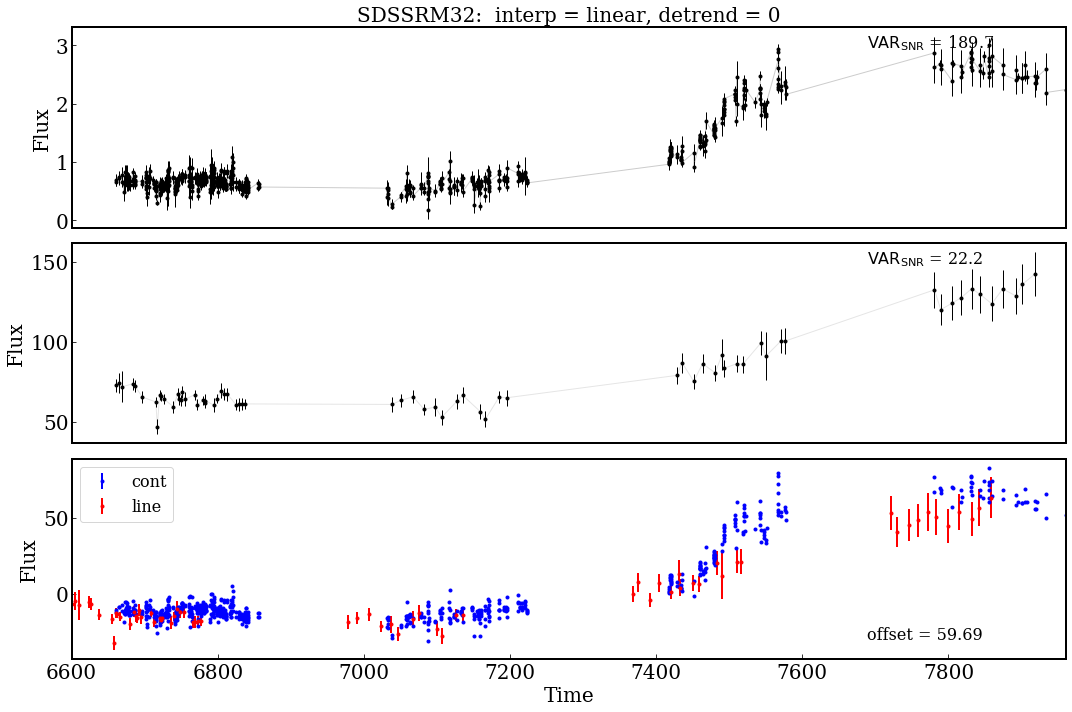

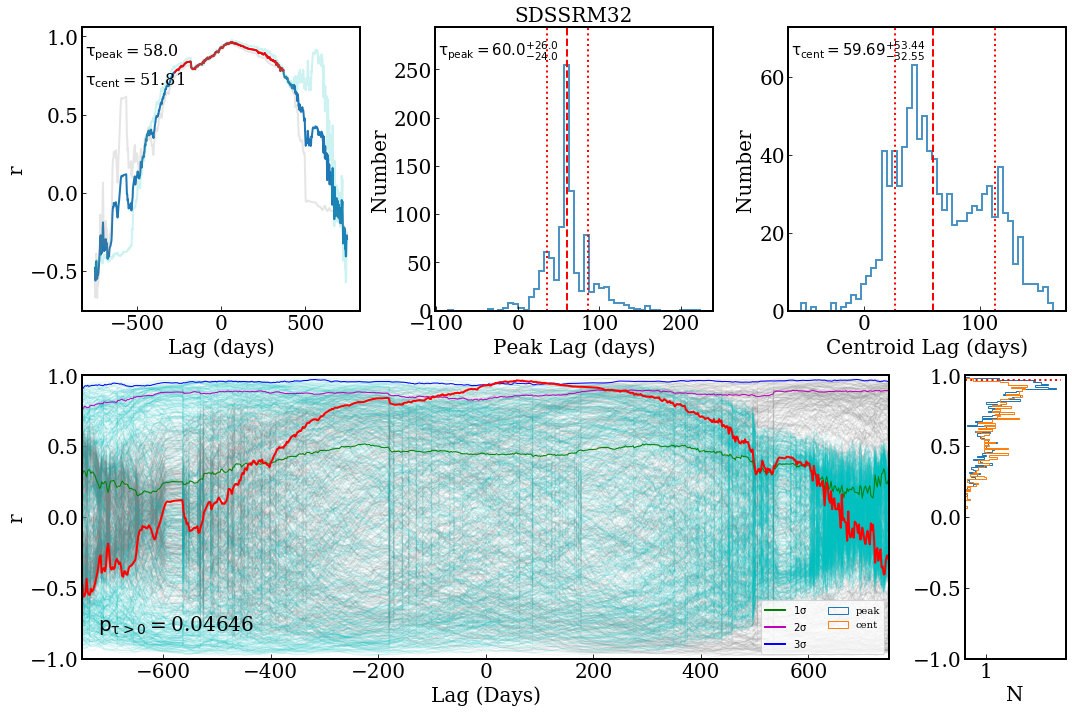

In [13]:
%matplotlib inline
import numpy as np
import carmcmc as cm
import glob,os,sys,timeit
from ccf import CCF
from matplotlib import pyplot as plt
#plt.style.use('my')

#set figure styles
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=5
plt.rcParams['xtick.minor.size']=3
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['font.family']='serif'
plt.rcParams['lines.linewidth']=2


#read data
con=np.genfromtxt('/Users/legolason/study/iccf/sdss_grier_results/rm32_con.txt')
line=np.genfromtxt('/Users/legolason/study/iccf/sdss_grier_results/rm32_line.txt')
cont,conf,cone=con[:,0],con[:,1],con[:,2]
linet,linef,linee=line[:,0],line[:,1],line[:,2]


#calculate CCF and plot figures
start = timeit.default_timer()
c=CCF()
c.ICCF(cont,                                # time of continuum light curve (LC)
       conf,                                # flux of continuum light curve
       cone,                                # error of continuum light curve
       linet,                               # time of emission-line light curve
       linef,                               # flux of emission-line light curve
       linee,                               # error of emission-line light curve
       tau_min=-750,                        # lower limit of lag search range
       tau_max=750,                         # upper limit of lag search range
       step=2,                              # step size   
       detrend=0,                           # detrend with nth polynormial                          
       interp='linear',                     # interpolation mode, 'linear' or 'carma'
       mcmc_nsamples=10000,                 # MCMC samplers in carma model, usually larger than 5000 
       auto_pq=False,                       # search the best p and q for continuum/emission-line light curves if True
       p1=1,                                # parameters of CARMA model for continuum LC, p1 > q1 requied
       q1=0,                                # parameters of CARMA model for continuum LC, p1 > q1 requied
       p2=1,                                # parameters of CARMA model for emission-line LC, p1 > q1 requied
       q2=0,                                # parameters of CARMA model for emission-line LC, p1 > q1 requied
       carma_model='random',                # LC used for carma interpolation, 'random' or 'mean'
       sig_cut=0.8,                         # top CCF fraciton used to calculate cetroid, r_max*sig_cut
       imode=0,                             # interpolation direction, 0: two ways, 1: interpolate y2, 2: interpolate y1
       MC_ntrials=1000,                     # number of Monte Carlo process for error estimation 
       FR_RSS=0,                            # 0: both FR/RSS, 1: FR, 2: RSS
       sigmode=0.2,                         # r_max <sigmode will be removed as failed CCF in error analysis 
       weight=False,                        # apply weights if True
       nsmooth_wgts=10,                     # n pixel to smooth the lag posterier to obtain the local minimum
       sim_ntrials=1000,                    # number of simulations for the significance test
       scale_simLC=False,                   # scale the simulated LC' mean and variance to those of orignial LC 
       Nmodel=2,                            # number of models to produce the simulated LC
       MP=True,                             # multiprocess if True
       name='SDSSRM32',                     # name 
       plotLC=True,                         # plot figure if True
       shift='centroid',                    # shift emission-line LC with lag centroid  
       plotCCF=True,                        # plot figure if True
       save=True,                           # save figure and results if True
       lite=False,                          # save a lite version for results
       path='/Users/legolason/Desktop/')    # path to save figures and results
end = timeit.default_timer()
print 'Fitting finished in : '+str(np.round(end-start,2))+'s'



#### Reproduce the above figures
#### 2) Plot the orignial light curves if detrend = 0

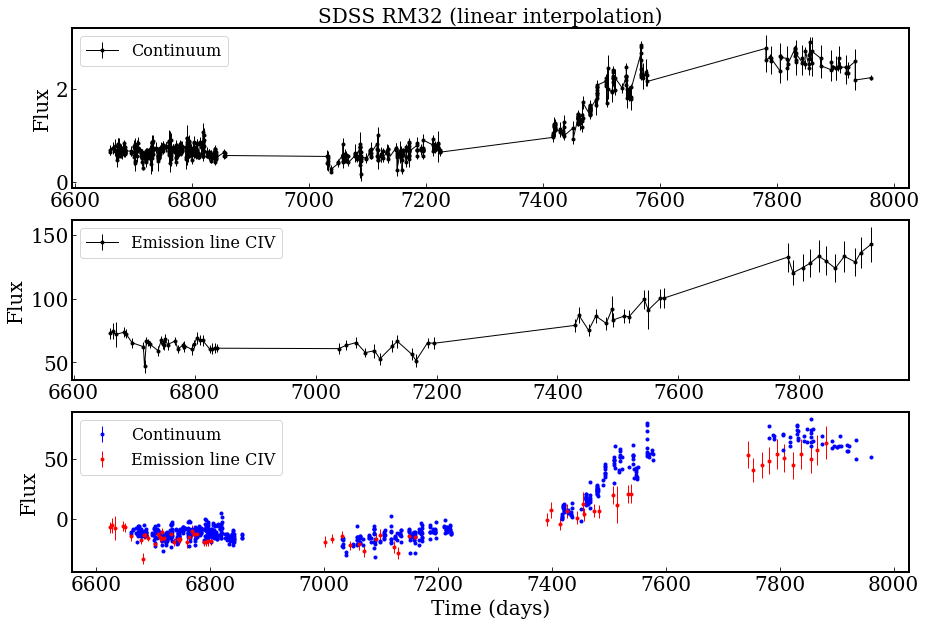

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(311)
plt.errorbar(c.t1,c.y1,yerr=c.e1,fmt='.-',color='k',lw=1,label='Continuum')
plt.ylabel('Flux')
plt.legend(fontsize=16)
plt.title('SDSS RM32 (linear interpolation)')
plt.subplot(312)
plt.errorbar(c.t2,c.y2,yerr=c.e2,fmt='.-',color='k',lw=1,label='Emission line CIV')
plt.ylabel('Flux')
plt.legend(fontsize=16)
plt.subplot(313)
plt.errorbar(c.t1,(c.y1-c.y1.mean())*c.y2.std()/c.y1.std(),yerr=c.e1,fmt='.',color='b',lw=1,label='Continuum')
plt.errorbar(c.t2-c.lag_cen_MC[1],c.y2-c.y2.mean(),yerr=c.e2,fmt='.',color='r',lw=1,label='Emission line CIV')
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.legend(fontsize=16)

#### 3) Plot the CCF result.  
We run two-way calcualtion: y1 with interpolated y2 or interpolated y1 with y2. We also calculate the data-based CCF. If the peak hits the boundaries, we call it failed CCF, which is removed in STEP 4.

Text(0.01,0.8,'$\\rm \\tau_{cen}=$51.81')

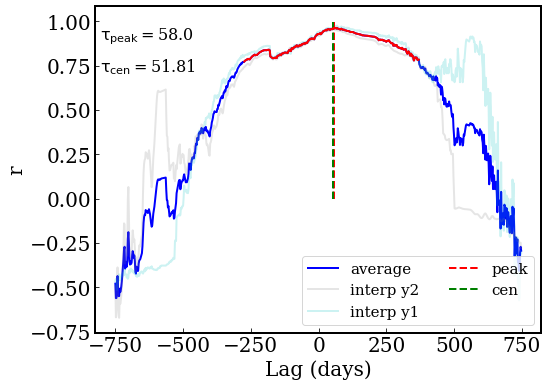

In [15]:
plt.figure(figsize=(8,6))
ax=plt.subplot(111)
plt.plot(c.lag,c.r,'b',label='average')
plt.xlabel('Lag (days)')
plt.ylabel('r')


plt.plot(c.lag_2,c.r_2,'grey',alpha=0.2,label='interp y2')
plt.plot(c.lag_1,c.r_1,'c',alpha=0.2,label='interp y1')


lag_peak, lag_cen, r_peak, r_cen = c.Lag_center(c.lag,c.r)

plt.plot([lag_peak,lag_peak],[0,1],'r--',label='peak')

plt.plot([lag_cen,lag_cen],[0,1],'g--',label='cen')
plt.legend(loc=4,fontsize=15,ncol=2)

ind=np.where(c.r>0.8*c.r.max(),True,False) 
plt.plot(c.lag[ind],c.r[ind],'r')

plt.text(0.01,0.9,r'$\rm \tau_{peak}=$'+str(np.round(lag_peak,2)),transform = ax.transAxes,fontsize=16)
plt.text(0.01,0.8,r'$\rm \tau_{cen}=$'+str(np.round(lag_cen,2)),transform = ax.transAxes,fontsize=16)

#### 4) Run flux randomization with Monte Carlo method and plot the lag distributions.
We perturb the flux with a zero-mean random Gaussian noise whose $\sigma$ is the original error at each time. Also failed CCFs are excluded if have. 

Failed CCF: 0


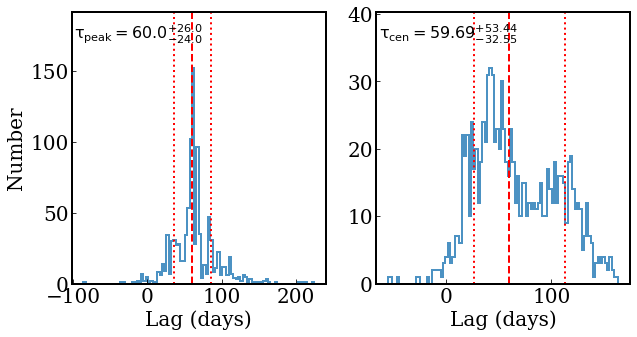

In [16]:
plt.figure(figsize=(10,5))
ax=plt.subplot(121)
plt.hist(c.lag_peak_MC,bins=100,histtype='step',lw=2,alpha=0.8)
ymin,ymax=plt.ylim()
ymax=ymax*1.2
plt.plot([c.peak_pack_MC[1]-c.peak_pack_MC[0],c.peak_pack_MC[1]-c.peak_pack_MC[0]],[ymin,ymax],'r:')
plt.plot([c.peak_pack_MC[1],c.peak_pack_MC[1]],[ymin,ymax],'r--')
plt.plot([c.peak_pack_MC[1]+c.peak_pack_MC[2],c.peak_pack_MC[1]+c.peak_pack_MC[2]],[ymin,ymax],'r:')
plt.ylim(ymin,ymax)
plt.ylabel('Number')
plt.xlabel('Lag (days)')
plt.text(0.01,0.9,r'$\rm \tau_{peak}='+str(c.peak_pack_MC[1])+'^{+'+str(c.peak_pack_MC[2])+'}'
         +'_{-'+str(c.peak_pack_MC[0])+'}$',transform = ax.transAxes,fontsize=16)

ax=plt.subplot(122)
plt.hist(c.lag_cen_MC,bins=100,histtype='step',lw=2,alpha=0.8)
ymin,ymax=plt.ylim()
ymax=ymax*1.2
plt.plot([c.cen_pack_MC[1]-c.cen_pack_MC[0],c.cen_pack_MC[1]-c.cen_pack_MC[0]],[ymin,ymax],'r:')
plt.plot([c.cen_pack_MC[1],c.cen_pack_MC[1]],[ymin,ymax],'r--')
plt.plot([c.cen_pack_MC[1]+c.cen_pack_MC[2],c.cen_pack_MC[1]+c.cen_pack_MC[2]],[ymin,ymax],'r:')
plt.ylim(ymin,ymax)

plt.xlabel('Lag (days)')
plt.text(0.01,0.9,r'$\rm \tau_{cen}='+str(c.cen_pack_MC[1])+'^{+'+str(c.cen_pack_MC[2])+'}'
    +'_{-'+str(c.cen_pack_MC[0])+'}$',transform = ax.transAxes,fontsize=16)
print 'Failed CCF:',c.failed_CCF_MC

#### 5) Plot the CCF simulation results.
We also run two-way simulations: measure CCF with real y1 and simulated y2, and real y2 and simulated y1. We define the significance $\rm p_{\tau>0}$ as the fraction of the simulated CCF peaks exceeding the CCF in all simulations. Also, we plot the 1-3 $\sigma$ levels of our CCF simulations. Here $\rm p_{\tau>0}$ = 0.046 means in 1000 trials, there are 46 trials that have the $\rm r_{max}$ higher than real CCF. Note that here we only consider the positive region.    

Text(0.02,0.1,'$\\rm p_{\\tau>0}=$0.04646')

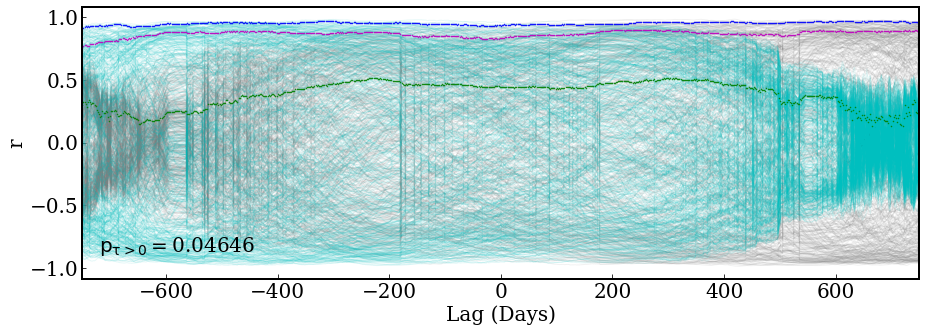

In [17]:
plt.figure(figsize=(15,5))
ax=plt.subplot(111)
for i in range(c.r_sim.shape[0]):
    if i <c.r_sim.shape[0]/2.:
        plt.plot(c.lag_sim[i,:],c.r_sim[i,:],'gray',lw=1,alpha=0.1)
    else:
        plt.plot(c.lag_sim[i,:],c.r_sim[i,:],'c',lw=1,alpha=0.1)

for i in range(c.r_sim.shape[1]):
    plt.plot(c.lag_sim[0,i],np.percentile(c.r_sim[:,i], 68.3),'g.',ms=1)
    plt.plot(c.lag_sim[0,i],np.percentile(c.r_sim[:,i], 95.5),'m.',ms=1)
    plt.plot(c.lag_sim[0,i],np.percentile(c.r_sim[:,i], 99.7),'b.',ms=1)

plt.plot([],[],'g',label=r'$\rm 1\sigma$')
plt.plot([],[],'m',label=r'$\rm 2\sigma$')
plt.plot([],[],'b',label=r'$\rm 3\sigma$')
plt.xlim(c.tau_min,c.tau_max)
plt.xlabel('Lag (Days)')
plt.ylabel('r')

plt.text(0.02,0.1,r'$\rm p_{\tau>0}=$'+str(c.p_positive),transform = ax.transAxes,fontsize=20)

#### 6) Check the difference between two-way simulations. 
It shows no much difference between two ways for this objects except for the edges.

Text(0.5,1,'Simulated y2')

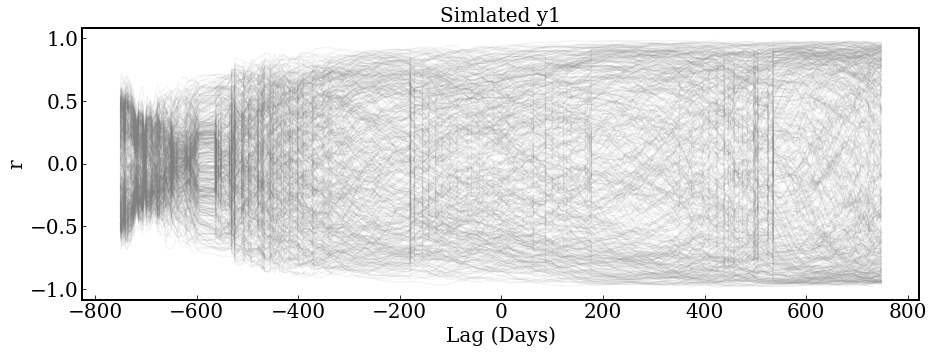

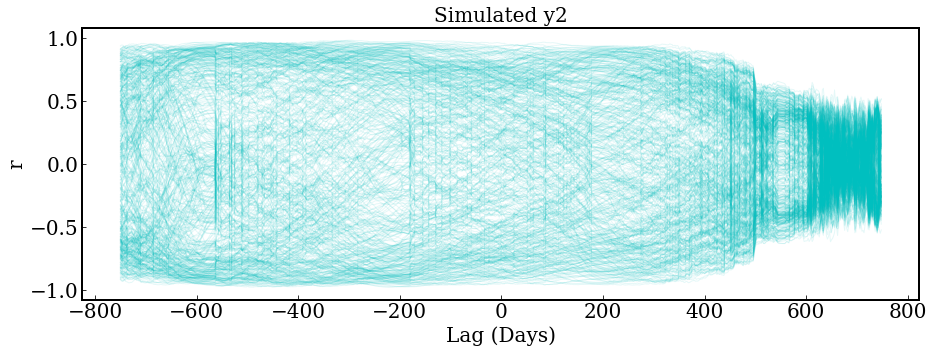

In [18]:
plt.figure(figsize=(15,5))
for i in range(c.r_sim.shape[0]):
    if i <c.r_sim.shape[0]/2.:
        plt.plot(c.lag_sim[i,:],c.r_sim[i,:],'gray',lw=1,alpha=0.1)
plt.xlabel('Lag (Days)')
plt.ylabel('r')
plt.title('Simlated y1')

plt.figure(figsize=(15,5))
for i in range(c.r_sim.shape[0]):
    if i >c.r_sim.shape[0]/2.:
        plt.plot(c.lag_sim[i,:],c.r_sim[i,:],'c',lw=1,alpha=0.1)
plt.xlabel('Lag (Days)')
plt.ylabel('r')
plt.title('Simulated y2')

#### 7) Plot the simulated CCFs higher than actual CCF. 

Text(0,0.5,'r')

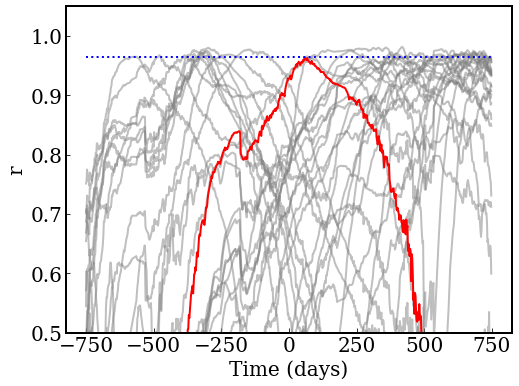

In [19]:
plt.figure(figsize=(8,6))
for i in range(c.r_sim.shape[0]):
    if c.r_sim[i,:].max()>c.r.max():
        plt.plot(c.lag_sim[i,:],c.r_sim[i,:],'grey',alpha=0.5)
plt.plot(c.lag,c.r,'r')
plt.plot([-750,750],[c.r.max(),c.r.max()],'b:')
plt.ylim(0.5,1.05)
plt.xlabel('Time (days)')
plt.ylabel('r')



####  8) Plot the distribution of lag and $\rm r_{max}$.


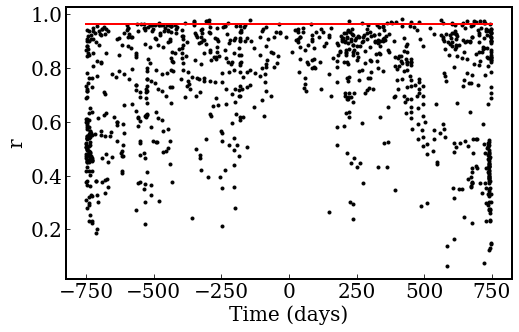

In [20]:
plt.figure(figsize=(8,5))
for i in range(c.r_sim.shape[0]):
    plt.plot(c.lag[np.argmax(c.r_sim[i,:])],c.r_sim[i,:].max(),'k.')
plt.xlabel('Time (days)')
plt.ylabel('r')

plt.plot([c.tau_min,c.tau_max],[c.r.max(),c.r.max()],'r-')



#### 9) Plot the distributions of simulated $\rm r_{peak}$ and $\rm r_{cen}$,  $\rm \tau_{peak}$ and  $\rm \tau_{cen}$. 
The simulated lags are randomly distributed. 

Text(0.5,0,'Lag')

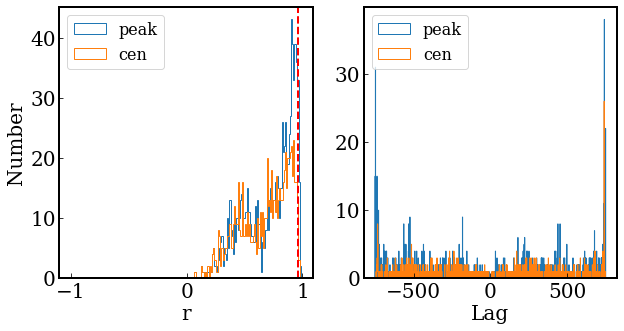

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(121)
a=plt.hist(c.r_sim_peak,np.arange(-1.,1.,0.01),histtype='step',label='peak')
a=plt.hist(c.r_sim_cen,np.arange(-1.,1.,0.01),histtype='step',label='cen')
plt.legend(fontsize=16,loc=2)

ymin,ymax=plt.ylim()
plt.plot([c.r.max(),c.r.max()],[ymin,ymax],'r--')
plt.ylim(ymin,ymax)
plt.xlabel('r')
plt.ylabel('Number')

plt.subplot(122)

a=plt.hist(c.lag_sim_peak,np.arange(c.tau_min,c.tau_max,1),histtype='step',label='peak')
a=plt.hist(c.lag_sim_cen,np.arange(c.tau_min,c.tau_max,1),histtype='step',label='cen')
plt.legend(fontsize=16,loc=2)

ymin,ymax=plt.ylim()
plt.ylim(ymin,ymax)
plt.xlabel('Lag')

#### 10) Plot 10 randomly selected simulated light curves. 
Here we did not scale the variability amplitude of the simualated light curves as the real data since we find that there is no much difference between them. But we still offer this option if you set the paramater scale_simLC = True. However, this wiil result in the power spectral density deviates from the orignial DRW model.

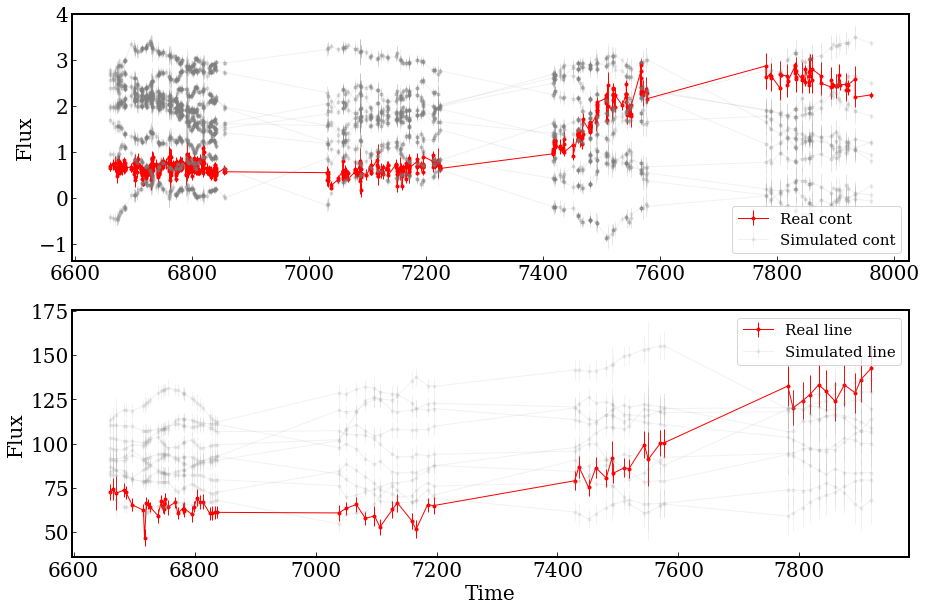

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.errorbar(c.t1,c.y1,yerr=c.e1,fmt='.-',color='r',lw=1,label='Real cont')

for i in enumerate(np.random.randint(0,c.ysim_t1_cadence.shape[0],10)):
    plt.errorbar(c.t1,c.ysim_t1_cadence[i[1]],yerr=c.e1,fmt='.-',color='grey',lw=1,alpha=0.1)
plt.errorbar([],[],yerr=[],fmt='.-',color='grey',lw=1,alpha=0.1,label='Simulated cont')
plt.ylabel('Flux')
plt.legend(fontsize=15)


plt.subplot(212)
plt.errorbar(c.t2,c.y2,yerr=c.e2,fmt='.-',color='r',lw=1,label='Real line')
for i in enumerate(np.random.randint(0,c.ysim_t2_cadence.shape[0],10)):
    plt.errorbar(c.t2,c.ysim_t2_cadence[i[1]],yerr=c.e2,fmt='.-',color='grey',lw=1,alpha=0.1)
plt.errorbar([],[],yerr=[],fmt='.-',color='grey',lw=1,alpha=0.1,label='Simulated line')
plt.ylabel('Flux')
plt.xlabel('Time')
plt.legend(fontsize=15)


#### 11) Select the highest r produced from the simulated CCF result and check the appearance of the simulated light curves. 
We can see the simulated CCF is indeed higher than actual CCF. The re-aligned light curves match well with the re-measured lag (319 days), which is simliar to 419 days. The centroid lag is -9999.0 due to its $\rm 0.8r_{max}$ region hits the boundary.

418.0 0.9819265567091593
0.98192816728178


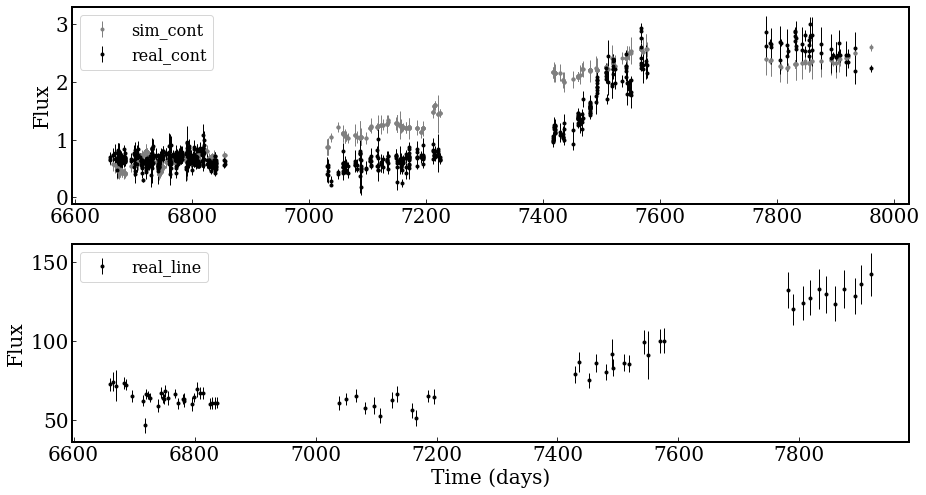

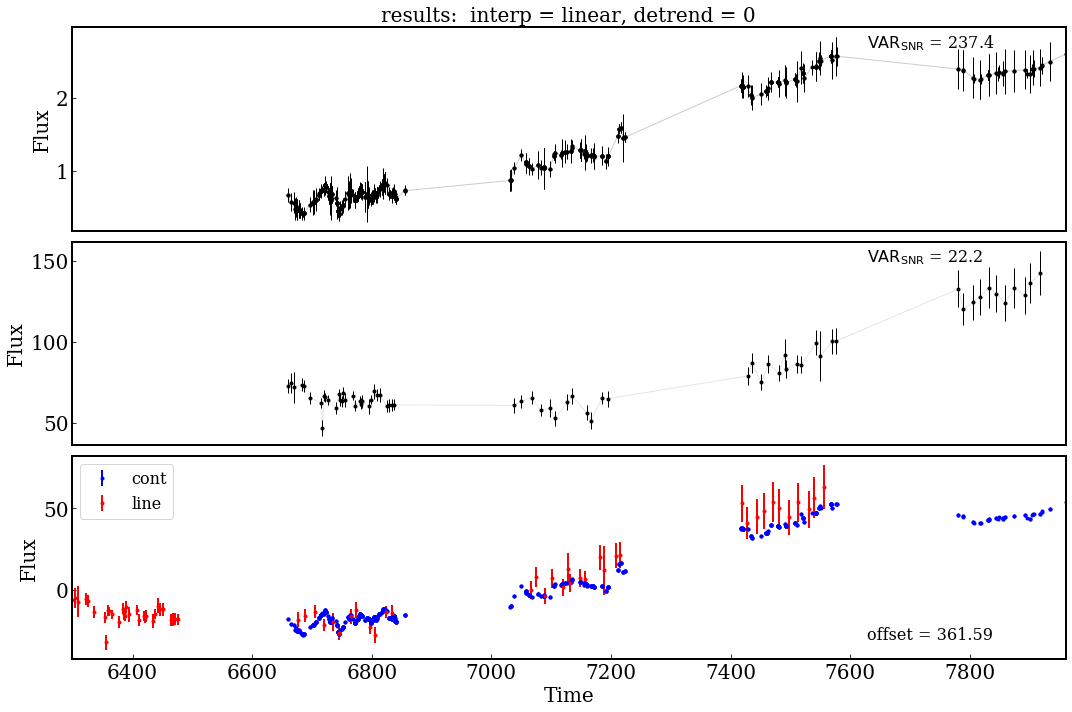

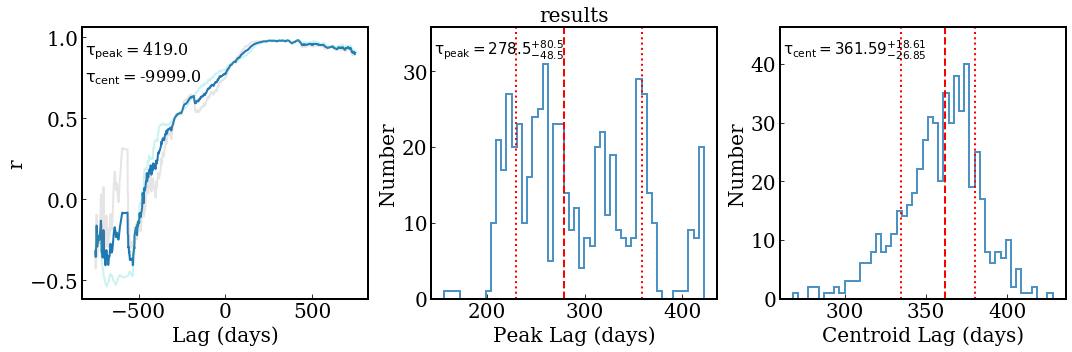

In [23]:
ind=np.where( (c.lag_sim_peak<c.tau_max) & (c.lag_sim_peak>0) & (c.r_sim_peak>c.r.max()))
idx= np.argmax(c.r_sim_peak[ind])
ind_highest= np.array(ind).flatten()[idx]


print c.lag_sim_peak[ind][idx],c.r_sim_peak[ind][idx]
#print ind,idx

#print c.lag_sim_peak[0],c.r_sim_peak[0]

plt.figure(figsize=(15,8))
if ind_highest<c.sim_ntrials/2:
    #sim cont
    plt.subplot(211)
    plt.errorbar(c.t1,c.ysim_t1_cadence[ind_highest,:],yerr=c.e1,fmt='.',color='grey',lw=1,label='sim_cont')
    plt.errorbar(c.t1,c.y1,yerr=c.e1,fmt='.',color='k',lw=1,label='real_cont')
    plt.legend(fontsize=16)
    plt.ylabel('Flux')
    plt.subplot(212)
    plt.errorbar(c.t2,c.y2,yerr=c.e2,fmt='.',color='k',lw=1,label='real_line')
    plt.legend(fontsize=16)
    plt.ylabel('Flux')
    plt.xlabel('Time (days)')
    
    c1=CCF()
    c1.ICCF(c.t1,c.ysim_t1_cadence[ind_highest,:],c.e1,c.t2,c.y2,c.e2,tau_min=-750,tau_max=750,step=1,detrend=0,
         interp='linear',mcmc_nsamples=10000,auto_pq=False,p1=1,q1=0,p2=1,q2=0,carma_model='random',sig_cut=0.8,
         imode=0,MC_ntrials=1000,sim_ntrials=0,weight=False,MP=True,plotLC=True,plotCCF=True,save=False)
    print  c1.r.max()
else:
    #sim line
    plt.subplot(211)
    plt.errorbar(c.t1,c.y1,yerr=c.e1,fmt='.',color='k',lw=1,label='real_cont')
    plt.ylabel('Flux')
    plt.legend(fontsize=16)
    plt.subplot(212)
    plt.errorbar(c.t2,c.y2,yerr=c.e2,fmt='.',color='k',lw=1,label='real_line')
    plt.errorbar(c.t2,c.ysim_t2_cadence[ind_highest-c.sim_ntrials/2,:],yerr=c.e2,fmt='.',color='grey',lw=1,label='sim_line')
    plt.ylabel('Flux')
    plt.xlabel('Time (days)')
    plt.legend(fontsize=16)
    
    c1=CCF()
    c1.ICCF(c.t1,c.y1,c.e1,c.t2,c.ysim_t2_cadence[ind_highest-c.sim_ntrials/2,:],c.e2,tau_min=-750,tau_max=750,step=1,detrend=0,
             interp='linear',mcmc_nsamples=10000,auto_pq=False,p1=1,q1=0,p2=1,q2=0,carma_model='random',sig_cut=0.8,
             imode=0,MC_ntrials=1000,sim_ntrials=0,weight=False,MP=True,plotLC=True,plotCCF=True,save=False)
    print  c1.r.max()





#### 12) Measure the time lag with DRW interpolation.
There are two choices for carma_model = "mean" or "random". "Mean" is the average DRW model for all MCMC samples (similar to linear interpolation), while "random"  selects a random realization to do the interpolation, which is closer to reality. Unlike JAVELIN, we use two independent DRW models to interpolate the light curves.


Fitting finished in : 373.85s


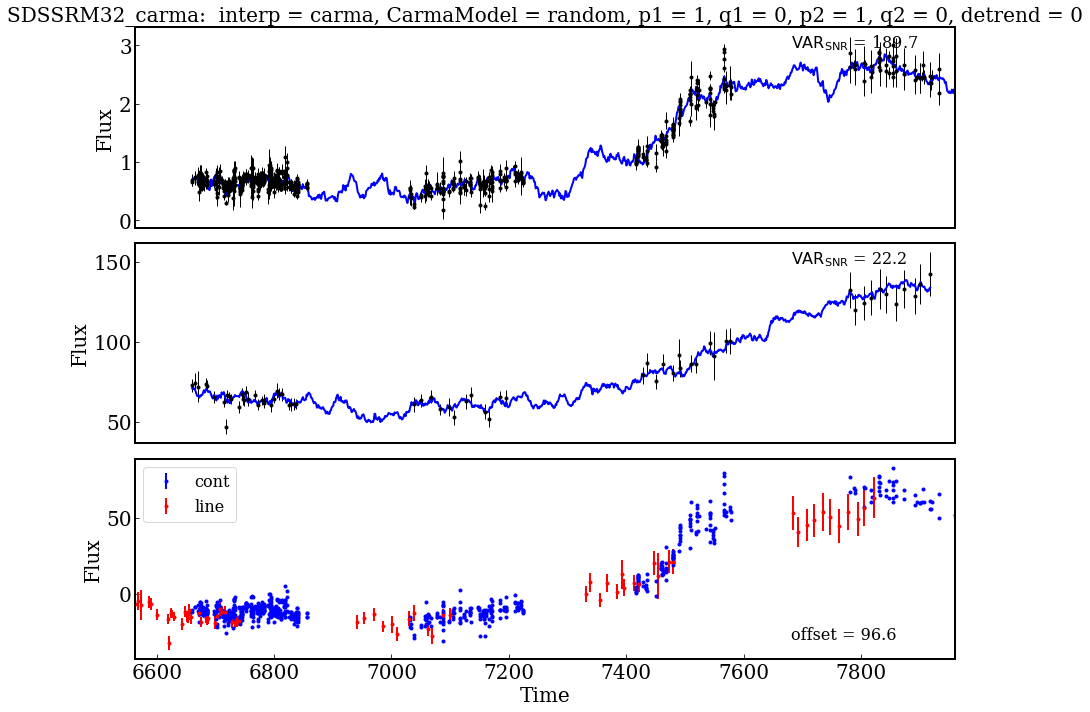

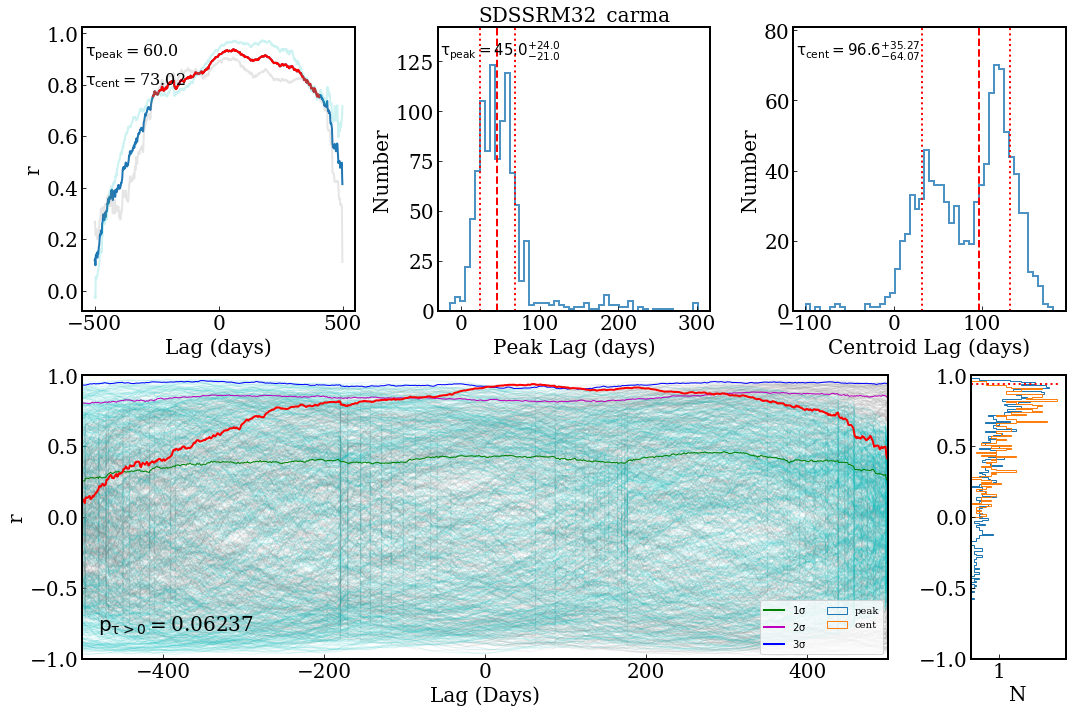

In [24]:
start = timeit.default_timer()
c=CCF()
c.ICCF(cont,conf,cone,linet,linef,linee,tau_min=-500,tau_max=500,step=1,detrend=0,
         interp='carma',mcmc_nsamples=5000,auto_pq=False,p1=1,q1=0,p2=1,q2=0,carma_model='random',sig_cut=0.8,
         imode=0,MC_ntrials=1000,sim_ntrials=1000,weight=False,MP=True,name='SDSSRM32_carma',plotLC=True,plotCCF=True,path='/Users/legolason/Desktop/')
end = timeit.default_timer()
print 'Fitting finished in : '+str(np.round(end-start,2))+'s'


#### 13) different interpolations

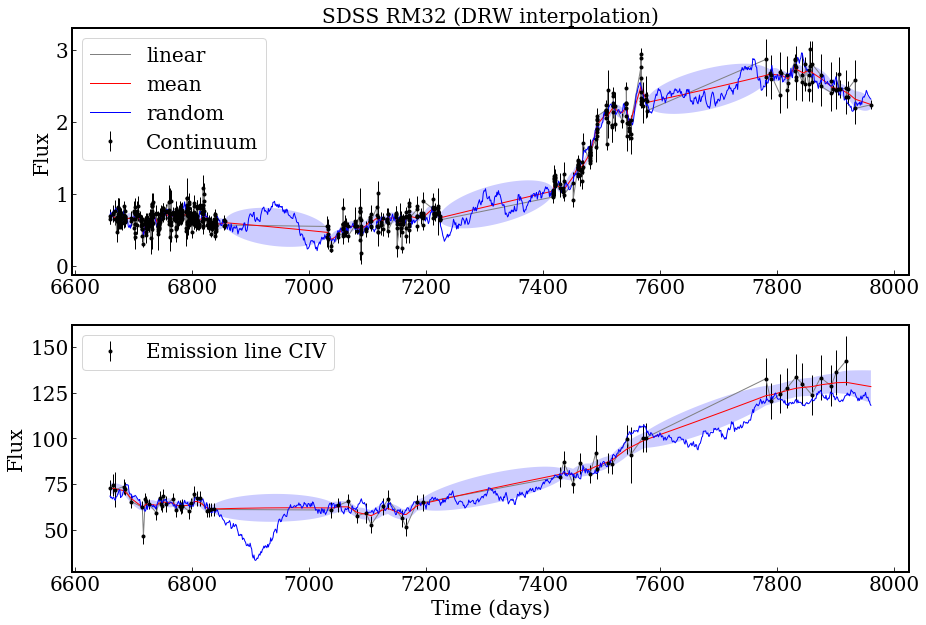

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.errorbar(c.t1,c.y1,yerr=c.e1,fmt='.',color='k',lw=1,label='Continuum')
plt.plot(c.t1,c.y1,'grey',lw=1,label='linear')
plt.ylabel('Flux')
plt.legend(fontsize=20)
plt.title('SDSS RM32 (DRW interpolation)')

time=np.linspace(cont.min(),cont.max(),1000)
# if carma_model = 'mean'
model_mean, model_var = c.sample1.predict(time, bestfit='map')
plt.plot(time,model_mean,'-r',lw=1,label='mean')
low = model_mean - np.sqrt(model_var)
high = model_mean + np.sqrt(model_var)
plt.fill_between(time, low,high, facecolor='blue', alpha=0.2)
# if carma_model = 'random'
ysim=c.sample1.simulate(time,bestfit='map')
plt.plot(time, ysim,'b',lw=1,label='random')
plt.legend(fontsize=20)

plt.subplot(212)
plt.errorbar(c.t2,c.y2,yerr=c.e2,fmt='.',color='k',lw=1,label='Emission line CIV')
plt.plot(c.t2,c.y2,color='grey',lw=1)
plt.ylabel('Flux')
plt.xlabel('Time (days)')
plt.legend(fontsize=20)

model_mean, model_var = c.sample2.predict(time, bestfit='map')
plt.plot(time,model_mean,'-r',lw=1)
low = model_mean - np.sqrt(model_var)
high = model_mean + np.sqrt(model_var)

plt.fill_between(time, low,high, facecolor='blue', alpha=0.2)
ysim=c.sample2.simulate(time,bestfit='map')
plt.plot(time, ysim,'b',lw=1)

#### 14) a new object RM 506 applied weighting function

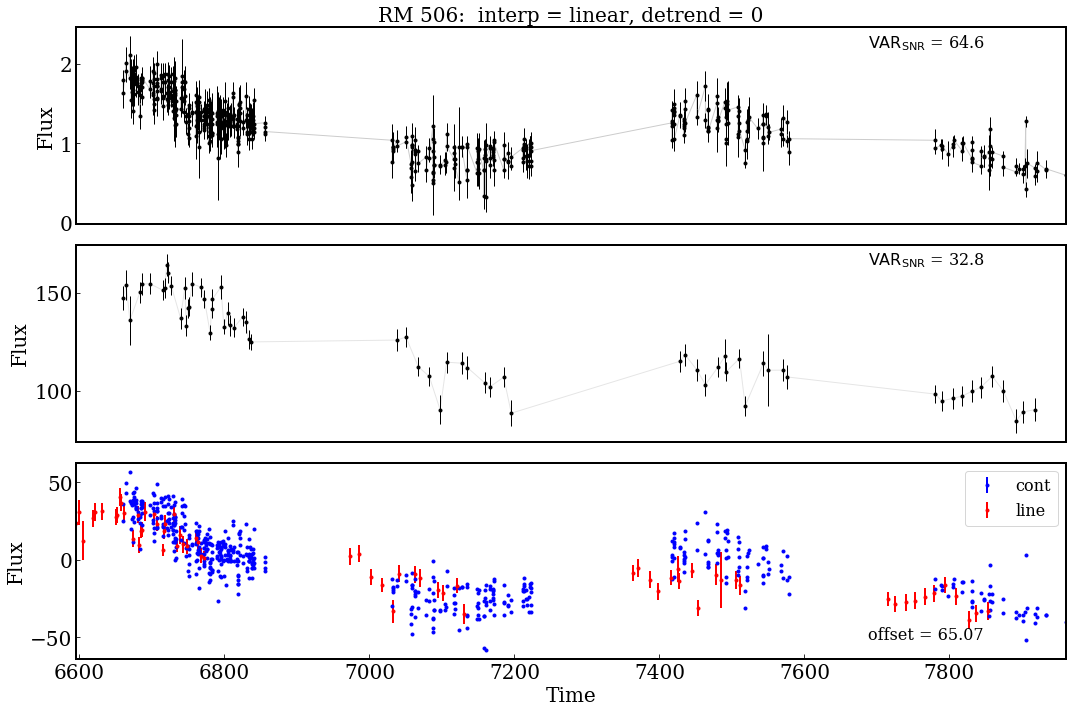

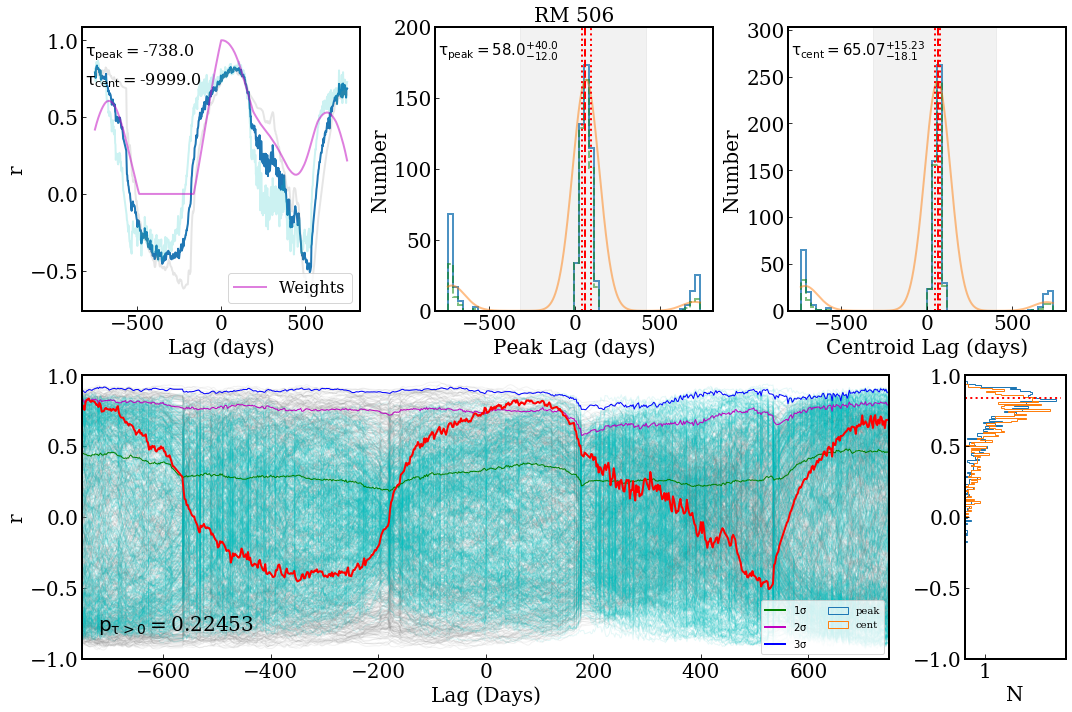

In [26]:
c=np.genfromtxt('./sdss_grier_results/rm506_con.txt')
l=np.genfromtxt('./sdss_grier_results/rm506_line.txt')
cont,conf,cone = c[:,1],c[:,3],c[:,4]
linet,linef,linee = l[:,1],l[:,3],l[:,4]


c=CCF()  
c.ICCF(cont,conf,cone,linet,linef,linee,tau_min=-750,tau_max=750,step=2,detrend=0,
     interp='linear',mcmc_nsamples=10000,auto_pq=False,p1=1,q1=0,p2=1,q2=0,carma_model='random',sig_cut=0.8,
     imode=0,MC_ntrials=1000,FR_RSS=0,sigmode=0.2,weight=True,nsmooth_wgts=1,sim_ntrials=1000,scale_simLC=False,
     Nmodel=2,MP=True,name='RM 506',plotLC=True,shift='centroid', plotCCF=True,save=True,lite=False,path='/Users/legolason/Desktop/')



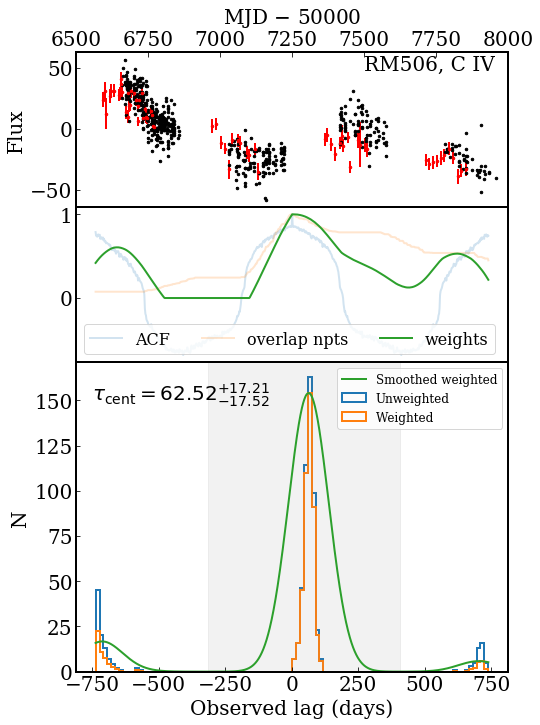

In [29]:
plt.figure(figsize=(8,10))
plt.subplots_adjust(hspace=0,left=0.15,bottom=0.07,top=0.93)
ax=plt.subplot(411)
plt.errorbar(c.t1,(c.y1-c.y1.mean())*c.y2.std()/c.y1.std(),yerr=c.e1,fmt='.',color='k',ms=5)
plt.errorbar(c.t2-c.cen_pack_MC[1],c.y2-c.y2.mean() ,yerr=c.e2,fmt='.',color='r',ms=5)
plt.title('MJD $-$ 50000',y=1.15)
plt.ylabel('Flux',fontsize=20)
plt.text(7500,48,'RM506, C IV',fontsize=20)
plt.xlim(6500,8000)
ax.tick_params(axis="x", bottom=False, top=True, labelbottom=False, labeltop=True)

plt.subplot(412)
plt.plot(c.lag_ACF,c.r_ACF,label='ACF',alpha=0.2)
plt.plot(c.lag_ACF,c.overlap_npt,label='overlap npts',alpha=0.2)
plt.plot(c.lag_ACF,c.weighting, label='weights')
plt.legend(fontsize=16,ncol=3)
plt.xticks([])


plt.subplot(4,1,(3,4))
a=plt.hist(c.lag_cen_MC,bins=100,histtype='step',lw=2,label='Unweighted')
weights = np.interp(c.lag_cen_MC, c.lag, c.weighting)
a=plt.hist(c.lag_cen_MC,bins=100,weights=weights,histtype='step',lw=2,label='Weighted')
f= a[0].max()/c.cen_kde.max()
plt.plot(c.lag_cen_kde, c.cen_kde*f,label='Smoothed weighted')
plt.axvspan(c.cen_left, c.cen_right, alpha = 0.1, color = 'grey')
plt.xlabel('Observed lag (days)')
plt.ylabel('N')
plt.text(-750,150, r'$\tau_{\rm cent} = 62.52^{+17.21}_{-17.52}$',fontsize=20)
plt.legend(fontsize=12,loc=1)


#### 15) calculate the significance of any peak
For example, we want to calculate the lag significance of the peak around 750 for RM 056 within the positive lag range.

In [34]:
print 'significance of the peak around 750:',c.CalSig_Other_Peak(700,800,0,750)

significance of the peak around 750: 0.598752598753
